<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Controller-Design:-The-Root-Locus-Angle-Deficiency-Method" data-toc-modified-id="Controller-Design:-The-Root-Locus-Angle-Deficiency-Method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><em>Controller Design:</em> The Root Locus Angle Deficiency Method</a></span><ul class="toc-item"><li><span><a href="#Example:-Angle-Deficiency-Design-steps-1-2" data-toc-modified-id="Example:-Angle-Deficiency-Design-steps-1-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example: Angle Deficiency Design steps 1-2</a></span></li><li><span><a href="#Where-we're-heading" data-toc-modified-id="Where-we're-heading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Where we're heading</a></span></li><li><span><a href="#Root-locus-of-a-system-under-PD-Control" data-toc-modified-id="Root-locus-of-a-system-under-PD-Control-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Root locus of a system under PD Control</a></span></li><li><span><a href="#PD-control-design-using-Angle-Deficiency" data-toc-modified-id="PD-control-design-using-Angle-Deficiency-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PD control design using Angle Deficiency</a></span></li><li><span><a href="#Root-locus-of-a-system-under-PI-control" data-toc-modified-id="Root-locus-of-a-system-under-PI-control-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Root locus of a system under PI control</a></span></li><li><span><a href="#Angle-Deficiency-Design-for-PI-Control" data-toc-modified-id="Angle-Deficiency-Design-for-PI-Control-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Angle Deficiency Design for PI Control</a></span></li></ul></li><li><span><a href="#Summary-of-Angle-Deficiency-Goals-and-Process" data-toc-modified-id="Summary-of-Angle-Deficiency-Goals-and-Process-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary of Angle Deficiency Goals and Process</a></span></li></ul></div>

# Challenge

In today's notebook, your challenge is to use **everything** you've learned about the root locus to learn to place a **controller's zero** in *just the right place* so that our system's root locus passes through a desired eigenvalue! This technique can be used to design controllers for higher-order (3rd and above) systems! 

In our examples and in this week's (lab 6), we are using "guess and check" to find out the right location for our PI controller's zero.  While this is fine, it can take quite a while! An analytical tool that would allow us to place this zero "automatically" would save lots of time!

**IMPORTANT: This notebook provides an interactive plot as a tool to help you build understanding. This plot is coded in the Python language, so in order to use Octave language in this notebook, we need a special `magic` command at the top of each code cell. To enable this, you MUST run the cell below before running any example code written in the Octave language.**

**ALSO IMPORTANT**: Today's exercise is in a separate notebook

In [1]:
%load_ext oct2py.ipython

## *Controller Design:* The Root Locus Angle Deficiency Method

At this point, you probably have a pretty good handle on what it means to sketch a root locus, but you might be wondering how it is used to design controllers for systems that may be too complex for the "direct method" of manipulating the characteristic equation.

The process we'll follow is actually very similar to the process we used for calculating angles of departure and arrival in our root locus sketching steps. This design process is called the **angle deficiency method** of controller design. The design process consists of a few simple steps:

1. Sketch the root locus of our system under proportional control, along with a target "dominant" eigenvalue $s_d$ that we wish the system to have after the design is complete. If the rightmost (slowest) branches pass through a suitable eigenvalue that meets your design requirement, use the magnitude criterion to find the necessary proportional gain $K_p$ to achieve your goal, and proceed to step 6. If not, proceed to step 2.


2. If the system is unable to reach our performance target under proportional control, determine whether adding a first-order zero (PD control), a first-order zero and a pole at the origin (PI control), or a second-order zero and a pole at the origin (PID control) might "bend" the root locus in the proper direction to allow you to hit your desired eigenvalue location. In general, if you need to "bend" the rightmost root locus branches to the left, try PD control first, and if you need to "bend" the rightmost branches to the right, try PI control first. 
3. Using PD, PI, or PID control, and the angle criterion for the root locus, calculate the location of the controller zero(s) that will allow the root locus to hit your desired eigenvalue location $s_d$. 


4. Using the magnitude criterion, calculate the "root locus gain" $K$ that will allow you to achieve your desired eigenvalue with your chosen zero location. 
5. Using your controller transfer function, the now-known zero location(s) and root locus gain, calculate the unknown controller gains needed to implement your controller.
6. Simulate the response of your system under closed-loop control given your new controller design. Pay particular attention to the minimum and maximum controller outputs (plant inputs) that result from a step input on $r(s)$ of a magnitude relevant to your overall design goals. If the controller is physically feasible, you're done! If it is not, you may have to rethink your design.

### Example: Angle Deficiency Design steps 1-2
To illustrate the necessity of steps 2-5 of this process, consider a scenario in which you'd like to control a second-order system with:
$$P(s) = \frac{1}{(s+8)(s+12)},H(s)=1$$

Let's say that we'd like to hit closed loop performance with $\zeta=.707$ and $\omega_n=\sqrt{288}\frac{rad}{s}$, which puts our desired closed loop eigenvalue at $s_d=-12+12j$. If you don't remember why, revisit the [Week 3 Monday notebook](../Week03_Monday/Week03_Monday.ipynb##Damping-Ratio,-Natural-Frequency,-and-Damped-Natural-Frequency-for-underdamped-systems), and its discussion of complex conjugate pole pairs.

Step 1 of the angle deficiency design process says that we should try proportional control first. Under proportional control, our system's root locus looks like this:

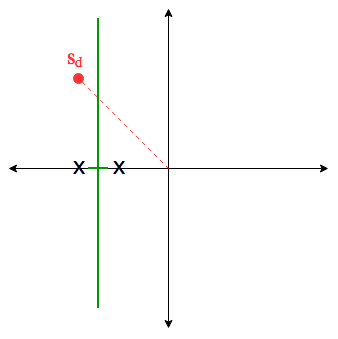

So, for this scenario, we will need a controller other than a proportional controller to achieve our performance goals. 

To decide which type of controller we'll need, we calculate the "angle deficiency" of the system under proportional control. In other words, we calculate how far from $\angle G(s)H(s) = \pm 180^\circ$ our system is. To do this, let's calculate the angle of the transfer function $G(s)H(s)$ when it is evaluated at $s = s_d=-12+12j$.

We'll use the method we learned for calculating angles of departure and arrival, which is generalizable to any scenario in which we need to find a "missing angle," or **angle deficiency,** needed to satisfy the angle criterion. In other words, if the point $s_d$ was on the root locus, we would know that

$$\left.\angle(G(s)H(s))\right|_{s=s_d}=\sum(\angle zeros(G(s)H(s))\rightarrow s_d) - \sum(\angle poles(G(s)H(s))\rightarrow s_d)=\pm 180^\circ$$

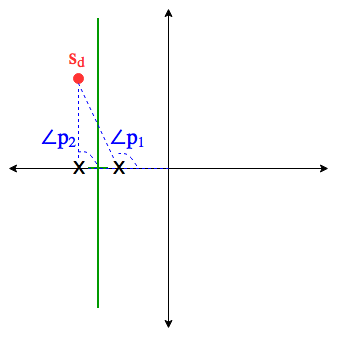

For our example system, the angle equation for the open loop transfer function evaluated at $s=s_d$ can be written: 

$$\left.\angle(G(s)H(s))\right|_{s=s_d}=0-\angle p_1 - \angle p_2 = 0 - \tan^{-1}\left(\frac{12}{0}\right) - \tan^{-1}\left(\frac{12}{-4}\right) = 0-90^\circ-108.43^\circ = -198.43^\circ \neq -180^\circ$$

As you can see, the point $s_d=-12+12j$ is **not** on the root locus because the angle of our transfer function $G(s)H(s)$ is not $\pm 180^\circ$. We call the angle $-180^\circ-(-198.43^\circ) = 18.43^\circ$ the **angle deficiency** of the system, which we usually denote as $\alpha$. Formally, we say that:

$$\alpha = 180 - \left.\angle(G(s)H(s))\right|_{s=s_d}$$

This angle deficiency for our example system is positive, which means that the root locus branches would have to bend to the *left* in order to hit our desired point $s=s_d$. This means, according to the steps above, that that we will likely have the best luck with PD control first. This is the subject of the next section of this reading. 

**Note:** I generally use either $-180^\circ$ or $180^\circ$ for evaluating the angle criterion based on which is closer to the total angle of my transfer function evaluated at a particular point. Notice that if we had evaluated the angle deficiency using $+180^\circ$ for this example, we would have found that $\alpha=378.43^\circ$, which, when $360^\circ$ is subtracted (to avoid repeating angles), gives us an identical answer of $\alpha=18.43^\circ$.

### Where we're heading

This notebook covers angle deficiency design of PD and PI controllers. Before we begin the angle deficiency design for each controller type, we will take a quick look back at how we can modify the PD, and PI control transfer functions we learned about so that they are applicable to the "canonical" root locus block diagram we've been using. Specifically, recall that a root locus is only useful if we vary *one* parameter in our controller, so we'll have to factor one value out of our controller in order for root locus analysis to be helpful.

### Root locus of a system under PD Control 

If we have a PD controller with a transfer function $C(s)=K_{sum}(K_p+K_ds)$, or a PD controller with a "summing gain," we generally will factor $K_d$ out of $C(s)$ as follows:

$$C(s) = K_{sum}\left(K_p + K_ds\right)=K_{sum}K_d\left(s+\frac{K_p}{K_d}\right)$$

What this does is it explicitly calls out the zero that the PD controller adds to the "forward path" of the control system at $s=-\frac{K_p}{K_d}$. The "summing gain," which scales the **entire control signal u(s)**, allows us to "walk around" the root locus without changing the zero location, which is dictated by the ratio of kp and kd. Changing either one of these would change the zero location.

Let's call that zero location, which we can fix by fixing the ratio $\frac{k_p}{k_d}$, "$z$" and rewrite the controller transfer function again:

$$C(s)= K_{sum}K_d\left(s+z\right)$$

Now, let's wrap $K_{sum}K_d$ into one "gain factor" which we'll call $K$, so that the system matches what we drew above.

$$C(s) = KC^\star(s)= K\left(s+z\right)$$

Now, we draw the system with the plant $P(s)$ and the controller $C(s)$ as the following block diagram:

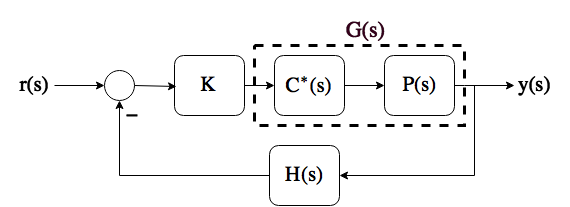

Then, when we draw the root locus, we draw the root locus of a system with the "open loop transfer function" 

$$G(s)H(s)=C^\star (s)P(s)H(s)$$

where we vary the "root locus gain" $K=K_{sum}K_d$. **WE WANT** to place the zero $s=-z$ in a fixed location so that the root locus will pass through the desired eigenvalue location $s=s_d$. This is one of the advantages of using the "summing gain" $K_{sum}$. That is, varying $K_{sum}$ will allow us to change the root locus gain $K=K_{p}K_{sum}$ without changing the ratio of $\frac{K_p}{K_d}$ (that is, without moving the controller zero).

Before we learn to use the angle deficiency method to solve this problem, let's look once again at our example from the introduction, where we wanted to control a plant with:

$$P(s) = \frac{1}{(s+8)(s+12)}$$

We will assume that $H(s)=1$ for algebraic simplicity, and we will look at the system's root locus under PD control with $C^\star(s)=s+z$. 

Use the following interactive plot to experiment with how hitting your design target eigenvalue $s_d$ requires you to move the controller zero $-z$ around the s-plane. We plot $s_d$ as a "trial point" in the following figure, and as always, if this point is on the root locus, the total angle of the transfer function $G(s)H(s)$ evaluated at this point must be $\pm 180 ^\circ$.

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from matplotlib.pyplot import *
from matplotlib.patches import Arc,Arrow
from scipy.signal import lti,step
from numpy import *
from numpy.lib import scimath
from control import rlocus


def updatePlot(trialpt_wn,trialpt_zeta,zero):
    #two poles (fourth order system) 
    openloop_num = [1, -zero]
    openloop_den = [1,20,96]
    sys_openloop = lti(openloop_num,openloop_den)

    
    #now we want to get the eigenvalues of the open loop system and plot them on the s-plane
    eigs_openloop = roots(openloop_den)
    realparts_ol = real(eigs_openloop)
    imagparts_ol = imag(eigs_openloop)
    
    #now we want to get the coordinates of the trial point so we can plot it
    eig1_trialpt  = 0j+-trialpt_wn*trialpt_zeta + scimath.sqrt((2*trialpt_zeta*trialpt_wn)**2-4*(trialpt_wn)**2)/2
    realparts_trial = real(eig1_trialpt)
    imagparts_trial = imag(eig1_trialpt)
    
    #now calculate the angles of the vectors from each pole of GH to the trial point.
    angle_p1t = arctan2(imagparts_trial-imagparts_ol[0],realparts_trial-realparts_ol[0])
    angle_p2t = arctan2(imagparts_trial-imagparts_ol[1],realparts_trial-realparts_ol[1])
    angle_z1t = arctan2(imagparts_trial,realparts_trial-zero)
    
    #now calculate the total angle of GH = sum(angles from zeros to trial point)-sum(angles from poles to trial point)
    angle_GH_total = angle_z1t - angle_p1t -angle_p2t
    
    #now we plot the points
    figure(figsize=(15,5))
    subplot(1,2,1)
    title('Root Locus For System and Trial Point at s='+str(real(realparts_trial))+'+'+str(imagparts_trial)+'j')
    [rlist,klist]= rlocus(sys_openloop,kvect = linspace(0,250,1000),Plot=False)
    plot(real(rlist[:,0]),imag(rlist[:,0]),real(rlist[:,1]),imag(rlist[:,1]))
    plot(realparts_ol,imagparts_ol,'kx',ms=15,mew=3)
    plot(zero,0,'ko',ms=15,mew=3,fillstyle='none')
    plot(realparts_trial,imagparts_trial,'k.',ms=15,mew=2)
    plot([realparts_ol[0], realparts_trial],[imagparts_ol[0],imagparts_trial],color='orange',linestyle='-.')
    plot([realparts_ol[1], realparts_trial],[imagparts_ol[1],imagparts_trial],'b-.')
    plot([zero, realparts_trial],[0,imagparts_trial],'g-.')
    
    
    
    xlabel('Real Part')
    ylabel('Imaginary Part')
    
    axis('equal')
    xlim([-50, 0])
    xlabel('')
    grid('on','both')
    
    #now plot the angles and their sum
    ax2=subplot(1,2,2)
    ax2.plot([0,cos(angle_p1t)],[0,sin(angle_p1t)],color='orange',linestyle='-.')
    ax2.plot([0,cos(angle_p2t)],[0,sin(angle_p2t)],color='blue',linestyle='-.')
    ax2.plot([0,cos(angle_z1t)],[0,sin(angle_z1t)],color='green',linestyle='-.')
    ax2.plot([0,cos(angle_GH_total)],[0,sin(angle_GH_total)],color='black',linestyle='-',linewidth=3)
    ax2.add_patch(Arrow(0,0,1,0,width=.05,edgecolor='black',facecolor='black'))
    ax2.add_patch(Arc((0, 0), .25, .25, theta1=0.0, theta2=180/pi*angle_p1t, edgecolor='orange'))
    ax2.add_patch(Arc((0, 0), .35, .35, theta1=0.0, theta2=180/pi*angle_p2t, edgecolor='blue'))
    ax2.add_patch(Arc((0, 0), .35, .35, theta1=0.0, theta2=180/pi*angle_z1t, edgecolor='green'))

    ax2.add_patch(Arc((0, 0), .65, .65, theta1=0.0, theta2=180/pi*angle_GH_total, edgecolor='black'))
    title('Magnitude Criterion Check')
    xlabel('Real axis')
    ylabel('imaginary axis')
    axis('equal')
    legend(['angle from pole 1 to trial: '+"{0:.2f}".format(angle_p1t*180/pi)+' deg','angle from pole 2 to trial: '+"{0:.2f}".format(angle_p2t*180/pi)+' deg','angle from zero 1 to trial: '+"{0:.2f}".format(angle_z1t*180/pi)+' deg','Total angle of GH (0-sum(angles of poles -> trial))'])
    
    
    show()
    

interact(updatePlot, trialpt_wn=widgets.FloatSlider(min=1,max=25,step=1,value=18),trialpt_zeta=widgets.FloatSlider(min=0.1,max=1,step=.01,value=.91),zero=widgets.FloatSlider(min=-50,max=-1,step=.1,value=-18))

interactive(children=(FloatSlider(value=18.0, description='trialpt_wn', max=25.0, min=1.0, step=1.0), FloatSli…

<function __main__.updatePlot(trialpt_wn, trialpt_zeta, zero)>

**TEST THIS:** As long as our desired eigenvalue is to the left of $s=-10$, we can "hit it" with the root locus using PD control with proper zero placement. 

**TEST THIS:** Adding a controller zero to the left of $s=-12$ will cause the root locus to make a "loop" and *bend* to the left. The loop's diameter is controlled by the location of the controller zero at $s=-z = -\frac{K_p}{K_d}$ (If you're interested in constructing this root locus for practice, try finding the break-in and break-away points!)

If our desired eigenvalue $s_d$ has a real component of *exactly* $s=-10$, we could hit the point using plain old P control. If we did ask for a desired angle $s_d$ with a real component of $-10$, the angle deficiency $\alpha$ of our system under proportional control would always be $0$, meaning that our point was on the root locus!

### PD control design using Angle Deficiency

While we could "experimentally" determine the controller zero location that would allow us to hit a desired point using a tool like the interactive plot above, it is actually much less work to use the angle deficiency $\alpha$ to place our controller zero directly. Looking once again at our angle criterion equation,

$$\left.\angle(G(s)H(s))\right|_{s=s_d}=\sum(\angle zeros(G(s)H(s))\rightarrow s_d) - \sum(\angle poles(G(s)H(s))\rightarrow s_d)=\pm 180^\circ$$

and noting that if when we don't achieve this we designate the "angle deficiency" as

$$\alpha = 180 - \left.\angle(G(s)H(s))\right|_{s=s_d}$$

It seems as if placing our controller zero at an angle $\alpha$ will ensure that our system's root locus touches our desired point! Remember that our system transfer function under PD control is:

$$G(s)H(s) = \frac{s+z}{(s+8)(s+12)}$$

Recall that it was simply $G(s)H(s) = \frac{1}{(s+8)(s+12)}$ under P control. Our unknown zero location turns the angle criterion equation into:

$$\left.\angle(G(s)H(s))\right|_{s=s_d} = \alpha_z -\angle p_1 - \angle p_2 = \pm 180^\circ$$

Graphically, this scenario looks like this:


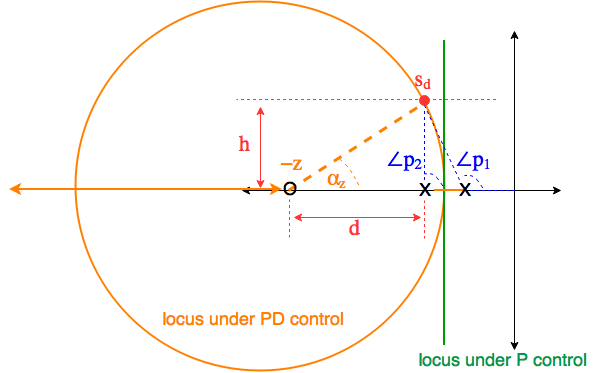

To find the controller zero $-z$, we use the angle deficiency. This time, we force the angle deficiency to be zero by solving for the unknown angle $\alpha_z$.

$$\left.\angle(G(s)H(s))\right|_{s=s_d}=\alpha_z-\angle p_1 - \angle p_2 = \alpha_z - \tan^{-1}\left(\frac{12}{0}\right) - \tan^{-1}\left(\frac{12}{-4}\right) = -180^\circ$$

Solving this gives $\alpha=18.43^\circ$. Then, looking at the triangle with sides $h$ and $d$ in the figure above, we can calculate that:

$$d=\frac{h}{\tan\alpha_z} = \frac{12}{.333}\approx 36$$

This tells us that $-z=-12-d=-48\frac{rad}{s}$. Because our controller transfer function is given by:

$$C(s) = KC^\star(s)=K(s+z) = K_{sum}K_d\left(s+\frac{K_p}{K_d}\right)$$

We can now say that $z = \frac{K_p}{K_d}=48$. Unfortunately, we still have to calculate our actual control gains in order to implement our controller!

Our next step toward this is using the magnitude criterion to say that:

$$\left| G(s)H(s)\right|_{s=s_d} = \left|\frac{-1}{K}\right|_{s=s_d}$$

Substituting $s_d=-12+12j$ into the magnitude criterion equation gives us:

$$\begin{matrix} \left| G(s)H(s)\right|_{s=s_d} &=  \left|\frac{s_d+48}{(s_d+8)(s_d+12)}\right| \\ &= \left|\frac{-12+12j+48}{(-12+12j+8)(-12+12j+12)}\right| \\ &= \left|\frac{\sqrt{36^2+12^2}}{\sqrt{144^2+48^2}}\right| \\ &= 0.25\end{matrix}$$

This tells us that $K=K_{sum}K_d=\frac{1}{.25}=4$. But we have only two equations for our three unknowns $K_{sum},K_p,K_d$, so we must "just pick" one of the gains. It is common to choose $K_{sum}=1$, but if the control voltages output by your controller design are either too high for your hardware (motor amplifier, etc) or too low to be useful in the face of the noise expected in your system, you may have to modify your choice for $K_{sum}$. If we assume $K_{sum}=1$, we have enough to solve for $K_p$ and $K_d$. Namely, we obtain:

$K_d = 4$, and $K_p = K_d*z = (4)(48) = 192$. This completes our controller design! The last step is to test our control design and predict its performance. We'll do this using Octave in the cells below. Make sure to run both. We will assume that we'd like a *unit* step to be the test case for this system. This won't be true for every system. 

In [3]:
%load_ext oct2py.ipython

The oct2py.ipython extension is already loaded. To reload it, use:
  %reload_ext oct2py.ipython


ans =

  -12.0000 + 12.0000i

  -12.0000 - 12.0000i

  -12.0000 +  0.0000i

   -8.0000 +  0.0000i

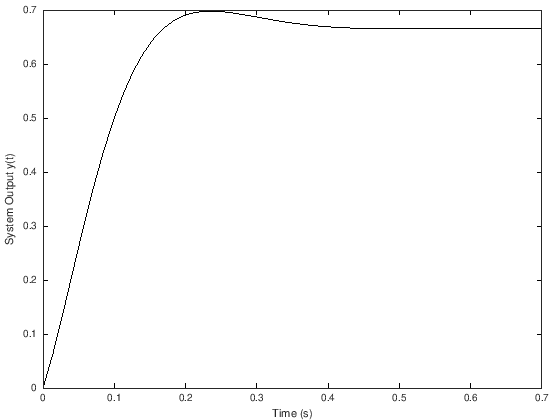

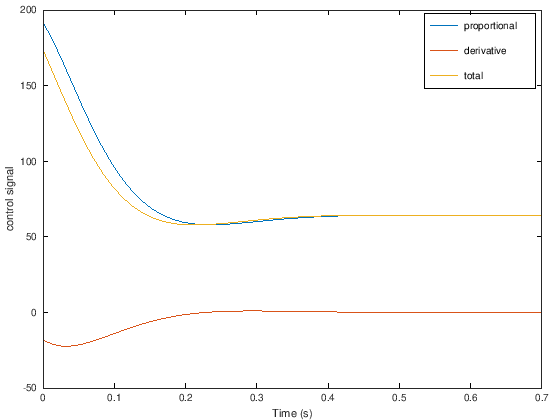

In [4]:
%%octave
s = tf('s');
H = 1;
P = 1/((s+12)*(s+8));
Ksum = 1;
Kp = 192;
Kd = 4;

C = Ksum*(Kp+Kd*s);

G_closedloop = C*P/(1+C*P*H);

%check eigenvalues
[num,den] = tfdata(G_closedloop,'v');
roots(den)%these should include an eig at -12+12j

%magnitude of our step input
r_mag = 1;
%simulate step response 
[y,t] = step(r_mag*G_closedloop);

%calculate our error signal
e = r_mag-y;
%calculate error derivative
dedt = [diff(e)./diff(t);0];%pad with a zero at the end
%calculate control voltage from each piece (proportional, derivative)
u_p = Ksum*Kp*e;
u_d = Ksum*Kd*dedt;
u_total = u_p+u_d;

%plot our results
figure()

plot(t,y,'k')
xlabel('Time (s)')
ylabel('System Output y(t)')
figure()
plot(t,u_p,t,u_d,t,u_total)
legend('proportional','derivative','total')
xlabel('Time (s)')
ylabel('control signal')

For this design, we'd have to analyze whether:

1. We were OK with a steady-state response of ~0.65 in response to a step request $r(s)$ of magnitude 1
2. It was reasonable to expect our controller output to be $200$ units. If this was a voltage to a motor, for instance, it might be a little high. 
3. We are OK with the fact that this system **will not have zero steady-state error!** You can check this using the FVT on the closed loop transfer function $\frac{y(s)}{r(s)}$.

Nevertheless, this illustrates an entire loop through the angle deficiency design process for a PD controller. 

### Root locus of a system under PI control 

For the example we just worked, it was sufficient to use PD control to hit our design target. However,  what if the desired behavior we wanted meant achieving a pole to the *right* of the branches of our example system's root locus under proportional control? What if, for instance, we wanted a pole at $s_d=-8+8j$?

Graphically, this would look like:

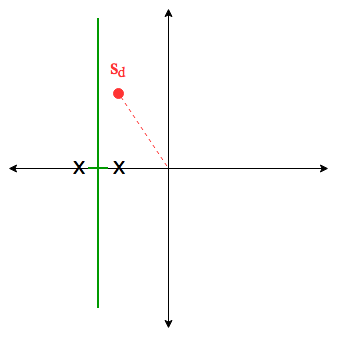

The angle deficiency for the system under proportional control is:

$$\alpha = 180^\circ - \left.\angle(G(s)H(s))\right|_{s=s_d} = 180^\circ - (0 - \tan^{-1}\frac{8}{0} -\tan^{-1} \frac{8}{4}) = 345.96^\circ = -14.04^\circ$$



Because the angle deficiency is negative (the target eigenvalue is to the left of the P-control branch), the rules suggest that we should try PI control. 

Let's use a PI controller with a summing gain:

$$C(s) = K_{sum}\left(K_p+\frac{K_i}{s}\right)=K_{sum}\frac{K_ps+K_i}{s}$$

We can factor K_p out of this controller as follows:

$$C(s) = K_{sum}K_p\frac{s+\frac{K_i}{K_p}}{s}=K\frac{s+z}{s} = KC^\star(s)$$

Which means we can cast our control problem as the following, root-locus-friendly block diagram:

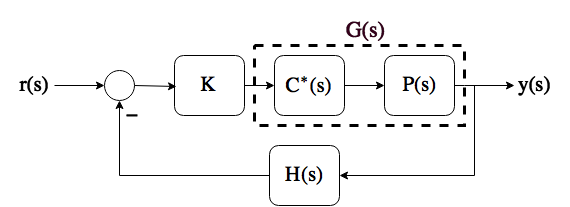

Note that this time the controller adds both a zero and a new pole to the forward path transfer function of the control system. By setting the ratio of $K_i$ and $K_p$, we can specify the location of the forward path transfer function's zero at $s=-z=-\frac{K_i}{K_p}$. Because the controller adds a new pole at the origin to the open-loop transfer function $G(s)H(s) = C^\star (s)P(s)H(s)$, we also change the shape of the root locus! See the interactive plot below, which allows you to place the PI controller's zero to  "experimentally" hit a desired point $s=s_d$ on the root locus.

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from matplotlib.pyplot import *
from matplotlib.patches import Arc,Arrow
from scipy.signal import lti,step
from numpy import *
from numpy.lib import scimath
from control import rlocus


def updatePlot(trialpt_wn,trialpt_zeta,zero):
    #two poles (fourth order system) 
    openloop_num = [1, -zero]
    openloop_den = [1,20,96, 0]
    sys_openloop = lti(openloop_num,openloop_den)

    
    #now we want to get the eigenvalues of the open loop system and plot them on the s-plane
    eigs_openloop = roots(openloop_den)
    realparts_ol = real(eigs_openloop)
    imagparts_ol = imag(eigs_openloop)
    
    #now we want to get the coordinates of the trial point so we can plot it
    eig1_trialpt  = 0j+-trialpt_wn*trialpt_zeta + scimath.sqrt((2*trialpt_zeta*trialpt_wn)**2-4*(trialpt_wn)**2)/2
    realparts_trial = real(eig1_trialpt)
    imagparts_trial = imag(eig1_trialpt)
    
    #now calculate the angles of the vectors from each pole of GH to the trial point.
    angle_p1t = arctan2(imagparts_trial-imagparts_ol[0],realparts_trial-realparts_ol[0])
    angle_p2t = arctan2(imagparts_trial-imagparts_ol[1],realparts_trial-realparts_ol[1])
    angle_p3t = arctan2(imagparts_trial-imagparts_ol[2],realparts_trial-realparts_ol[2])
    angle_z1t = arctan2(imagparts_trial,realparts_trial-zero)
    
    #now calculate the total angle of GH = sum(angles from zeros to trial point)-sum(angles from poles to trial point)
    angle_GH_total = angle_z1t - angle_p1t -angle_p2t - angle_p3t
    
    #now we plot the points
    figure(figsize=(15,5))
    subplot(1,2,1)
    title('Root Locus For System and Trial Point at s='+str(real(realparts_trial))+'+'+str(imagparts_trial)+'j')
    [rlist,klist]= rlocus(sys_openloop,kvect = linspace(0,500,1000),Plot=False)
    plot(real(rlist[:,0]),imag(rlist[:,0]),real(rlist[:,1]),imag(rlist[:,1]),real(rlist[:,2]),imag(rlist[:,2]))
    plot(realparts_ol,imagparts_ol,'kx',ms=15,mew=3)
    plot(zero,0,'ko',ms=15,mew=3,fillstyle='none')
    plot(realparts_trial,imagparts_trial,'k.',ms=15,mew=2)
    plot([realparts_ol[0], realparts_trial],[imagparts_ol[0],imagparts_trial],color='blue',linestyle='-.')
    plot([realparts_ol[1], realparts_trial],[imagparts_ol[1],imagparts_trial],color='orange',linestyle='-.')
    plot([realparts_ol[2], realparts_trial],[imagparts_ol[2],imagparts_trial],'g-.')
    plot([zero, realparts_trial],[0,imagparts_trial],'r-.')
    
    
    
    xlabel('Real Part')
    ylabel('Imaginary Part')
    
    axis('equal')
    xlim([-20, 0])
    ylim([-15,15])
    xlabel('')
    grid('on','both')
    
    #now plot the angles and their sum
    ax2=subplot(1,2,2)
    ax2.plot([0,cos(angle_p1t)],[0,sin(angle_p1t)],color='blue',linestyle='-.')
    ax2.plot([0,cos(angle_p2t)],[0,sin(angle_p2t)],color='orange',linestyle='-.')
    ax2.plot([0,cos(angle_p3t)],[0,sin(angle_p3t)],color='green',linestyle='-.')
    ax2.plot([0,cos(angle_z1t)],[0,sin(angle_z1t)],color='red',linestyle='-.')
    ax2.plot([0,cos(angle_GH_total)],[0,sin(angle_GH_total)],color='black',linestyle='-',linewidth=3)
    ax2.add_patch(Arrow(0,0,1,0,width=.05,edgecolor='black',facecolor='black'))
    ax2.add_patch(Arc((0, 0), .25, .25, theta1=0.0, theta2=180/pi*angle_p1t, edgecolor='blue'))
    ax2.add_patch(Arc((0, 0), .35, .35, theta1=0.0, theta2=180/pi*angle_p2t, edgecolor='orange'))
    ax2.add_patch(Arc((0, 0), .35, .35, theta1=0.0, theta2=180/pi*angle_p3t, edgecolor='green'))
    ax2.add_patch(Arc((0, 0), .35, .35, theta1=0.0, theta2=180/pi*angle_z1t, edgecolor='red'))

    ax2.add_patch(Arc((0, 0), .65, .65, theta1=0.0, theta2=180/pi*angle_GH_total, edgecolor='black'))
    title('Magnitude Criterion Check')
    xlabel('Real axis')
    ylabel('imaginary axis')
    axis('equal')
    legend(['angle from pole 1 to trial: '+"{0:.2f}".format(angle_p1t*180/pi)+' deg','angle from pole 2 to trial: '+"{0:.2f}".format(angle_p2t*180/pi)+' deg','angle from pole 3 to trial: '+"{0:.2f}".format(angle_p3t*180/pi)+' deg','angle from zero 1 to trial: '+"{0:.2f}".format(angle_z1t*180/pi)+' deg','Total angle of GH (0-sum(angles of poles -> trial))'])
    
    
    show()
    

interact(updatePlot, trialpt_wn=widgets.FloatSlider(min=1,max=25,step=1,value=10),trialpt_zeta=widgets.FloatSlider(min=0.1,max=1,step=.01,value=.7),zero=widgets.FloatSlider(min=-15,max=-1,step=.1,value=-7))

interactive(children=(FloatSlider(value=10.0, description='trialpt_wn', max=25.0, min=1.0, step=1.0), FloatSli…

<function __main__.updatePlot(trialpt_wn, trialpt_zeta, zero)>

As you play with the interactive plot, notice how the shape of the locus changes when you move the controller zero to different portions of the real axis. 

**TRY THIS:** Watch what happens if the zero is in between the controller pole at $s=0$ and the first plant pole at $s=-8$, if it's in between the two plant poles, or if it's to the left of both plant poles. We could wrestle with the interactive plot to help us place our zero, but just like the PD control design problem, it's far less work to use the angle deficiency to help us place our pole directly. 

### Angle Deficiency Design for PI Control

For our PI controller, we will work with the following controller transfer function:

$$C(s) = K_{sum}K_p\frac{s+\frac{K_i}{K_p}}{s}=K\frac{s+z}{s} = KC^\star(s)$$

Which means that our "open loop transfer function" for the root locus is:

$$G(s)H(s) = C^\star P(s)H(s) = \frac{s+z}{s(s+8)(s+12)}$$

As before with the PD control example, we will simply apply the angle criterion to our design to find the location of our control zero:

$$\left.\angle(G(s)H(s))\right|_{s=s_d}=\sum(\angle zeros(G(s)H(s))\rightarrow s_d) - \sum(\angle poles(G(s)H(s))\rightarrow s_d)=\pm 180^\circ$$

Plotting the angle criterion graphically on a pole-zero plot will allow us to determine the unknown angle from the controller zero to the pole, $\alpha_z$. 


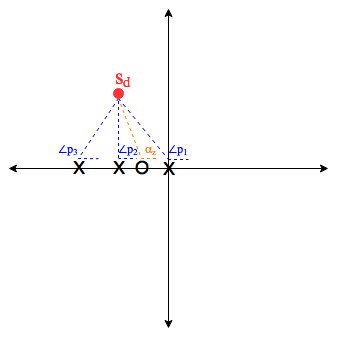

Of course, until we enforce the angle criterion numerically, $\alpha_z$ is still unknown. Our drawing of where the controller zero lies on the s-plane could be incorrect, so we won't presume to know exactly how the root locus will look under PI control until we know where our controller zero will end up. To compute $\alpha_z$, we apply the angle criterion:

$$\left. \angle (G(s)H(s))\right|_{s=s_d} = \alpha_z - \angle p_1 - \angle p_2 - \angle p_3 = \alpha_z - \tan^{-1}\frac{8}{-8}-\tan^{-1}\frac{8}{0} - \tan^{-1}\frac{8}{4}=\pm 180^\circ$$

Computing these angles yields $\alpha_z = 108.44^\circ$. This tells us that our controller zero is to the right of $s=-8$. Using trigonometry, we can find this zero's exact location at $-z = -5.3325$. Because we didn't draw the root locus for our new "open loop transfer function" above, let's let Python draw it below:

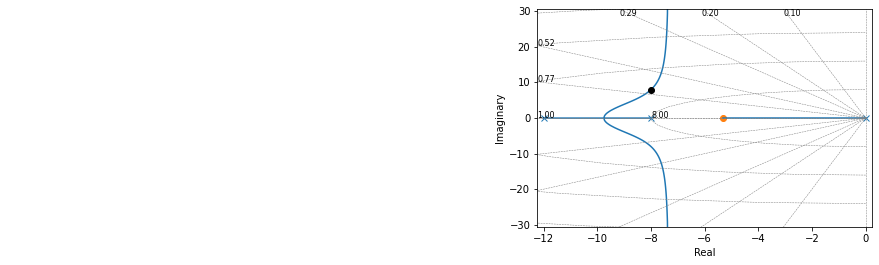

In [6]:
from control import rlocus #imports the root locus function from python's control library (matlab-like)
from numpy import * #imports matlab-like matrix library
from matplotlib.pyplot import * #imports plotting functions
from scipy.signal import lti #imports functions to make transfer functions

openloop_num = [1, 5.3325]#numerator coefficients in decreasing powers of s
openloop_den = [1,20,96, 0]#denominator coefficients
sys_openloop = lti(openloop_num,openloop_den);
rlocus(sys_openloop)
plot(-8,8,'ko')
show()


According to Python, our root locus now passes through our design eigenvalue $s_d$!! That's good news. Now, Using the magnitude criterion, we evaluate:

$$\left|G(s)H(s)\right|_{s=s_d} = \left|\frac{-1}{K}\right|$$

Evaluating the algebra here yields a root locus gain of $K=95.99$.

Now, for a PI controller, we know that $z=\frac{K_i}{K_p}$, and if we again assume $K_{sum}=1$, we can solve for our controller gains: $K_p = 95.99$, and $K_i = 511.9$.

Last, we'll simulate our design and check out the voltage magnitudes that result from a unit step request on $r(s)$.

ans =

  -8.0004 + 7.9996i

  -8.0004 - 7.9996i

  -3.9992 + 0.0000i

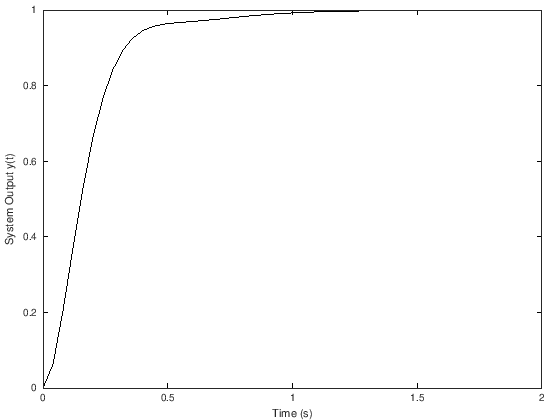

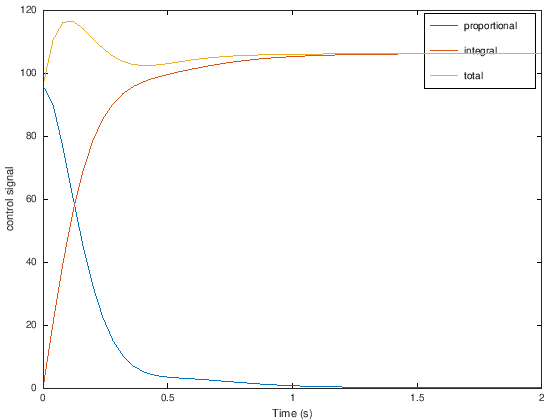

In [7]:
%%octave
s = tf('s');
H = 1;
P = 1/((s+12)*(s+8));
Ksum = 1;
Kp = 95.99;
Ki = 511.9;

C = Ksum*(Kp+Ki/s);

G_closedloop = minreal(C*P/(1+C*P*H));

%check eigenvalues
[num,den] = tfdata(G_closedloop,'v');
roots(den)%these should include an eig at -12+12j

%magnitude of our step input
r_mag = 1;
%simulate step response 
[y,t] = step(r_mag*G_closedloop);

%calculate our error signal
e = r_mag-y;
%calculate error derivative
[u_i,t] = lsim(Ki/s,e,t);%this simulates the error signal going through the ki/s transfer function.
%calculate control voltage from each piece (proportional, derivative)
u_p = Kp*e;
u_total = Ksum*(u_p+u_i);

%plot our results
figure()

plot(t,y,'k')
xlabel('Time (s)')
ylabel('System Output y(t)')
figure()
plot(t,u_p,t,u_i,t,u_total)
legend('proportional','integral','total')
xlabel('Time (s)')
ylabel('control signal')

Some interesting notes about this design: 

If we aren't concerned with the voltage magnitudes, some might argue that PI control was much more successful for this system than PD control (note that PD controller generates a controler signal that is almost 2X what is needed for PI).

However, integral gain of the PI controller drove steady-state error to zero! We asked for $r(s)=1$ in steady state, and the PI controller was able to hit that exactly! 

## Summary of Angle Deficiency Goals and Process

By using the angle criterion, we can place a controller zero at an "unknown angle" that guarantees that our root locus will pass through our design point. This allowed us to design a PD and a PI controller that met our design specifications. We will continue to develop this idea over the next week or two as we use the concept to solve more and more complex problems.